In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Step 1: Load and preprocess dataset
df = pd.read_csv("Social_Network_Ads.csv")
df = df.drop(columns=["User ID"])  # Drop irrelevant column

# Encode 'Gender' (Male=1, Female=0)
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# Step 2: Define features and target
X = df[["Gender", "Age", "EstimatedSalary"]]
y = df["Purchased"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Step 6: Predict on test set
y_pred = log_reg.predict(X_test_scaled)

# Step 7: Compute confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Step 8: Display results
print("Confusion Matrix:")
print(cm)
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Confusion Matrix:
[[50  2]
 [ 7 21]]
True Negatives (TN): 50
False Positives (FP): 2
False Negatives (FN): 7
True Positives (TP): 21
Accuracy: 0.8875
Error Rate: 0.1125
Precision: 0.9130
Recall: 0.7500


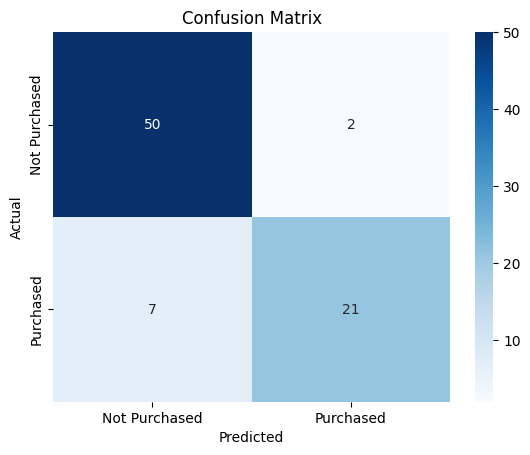

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()